<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/CO2_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Calculation of CO2 compression systems
#@markdown Litterature and calculations of CO2 recompression systems.
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

#Litterature
https://www.powermag.com/capturing-co2-gas-compression-vs-liquefaction/

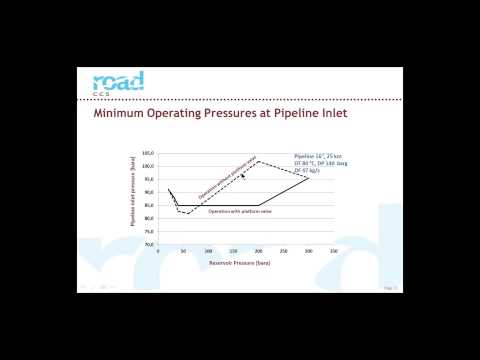

In [1]:
#@title From compressor to reservoir -- Flow assurance and control philosophy for CCS CO2 operation
#@markdown This video gives an intriduction to CO2 reinjection
from IPython.display import YouTubeVideo
YouTubeVideo('FPZxXX0fx40', width=600, height=400)

#The following example demonstrate calculation of a recompression and pumping system for CO2

In [21]:
from neqsim.thermo import fluid, phaseenvelope,printFrame
from neqsim.process import clearProcess, stream, valve, pump, separator, compressor, runProcess, viewProcess, heater, mixer, recycle, cooler

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("CO2", 2.0)
fluid1.setTemperature(35.15, "C")
fluid1.setPressure(1.5, "bara")
fluid1.setTotalFlowRate(0.5, "MSm3/day")


clearProcess()
stream1 = stream(fluid1,name='feed CO2')
compressor1 = compressor(stream1,pres=5.0, name='1st stage compressor')
cooler1 = cooler(compressor1.getOutStream(),name='1st stage after cooler')
cooler1.setOutTemperature(20.0, 'C')
compressor2 = compressor(cooler1.getOutStream(),pres=10.0, name='2ns stage compressor')
cooler2 = cooler(compressor2.getOutStream(),name='2nd stage after cooler')
cooler2.setOutTemperature(20.0, 'C')
compressor3 = compressor(cooler2.getOutStream(),pres=25.0, name='3rd stage compressor')
cooler3 = cooler(compressor3.getOutStream(),name='3rd stage after cooler')
cooler3.setOutTemperature(20.0, 'C')
compressor4 = compressor(cooler3.getOutStream(),pres=60.0, name='4th stage compressor')
cooler4 = cooler(compressor4.getOutStream(),name='4th stage after cooler')
cooler4.setOutTemperature(50.0, 'C')
pump1 = pump(cooler4.getOutStream(),name='CO2 injection pump',p=200.0)
runProcess()

print('1st stage compressor power ', compressor1.getPower()/1.0e6, ' MW')
print('2nd stage compressor power ', compressor2.getPower()/1.0e6, ' MW')
print('3rd stage compressor power ', compressor3.getPower()/1.0e6, ' MW')
print('4th stage compressor power ', compressor4.getPower()/1.0e6, ' MW')
print('CO2 injection pump ', pump1.getPower()/1.0e6, ' MW')

print('cooler 1 duty ', cooler1.getDuty()/1.0e6, ' MW')
print('cooler 2 duty ', cooler2.getDuty()/1.0e6, ' MW')
print('cooler 3 duty ', cooler3.getDuty()/1.0e6, ' MW')
print('cooler 4 duty ', cooler4.getDuty()/1.0e6, ' MW')


1st stage compressor power  0.8565174203905608  MW
2nd stage compressor power  0.43509095418346105  MW
3rd stage compressor power  0.5733428768285741  MW
4th stage compressor power  0.49610524392068117  MW
CO2 injection pump  0.7119994875116886  MW
cooler 1 duty  -1.0314991728532705  MW
cooler 2 duty  -0.4886947847046334  MW
cooler 3 duty  -0.7530435479458016  MW
cooler 4 duty  -0.5825667844401152  MW
